# Training and forecast of ML models with autoregressive terms

In [17]:
import pandas as pd
from datetime import datetime
from datetime import timedelta
from sklearn import tree
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error




In [2]:
ts60 = pd.read_csv('../VEOLIA/artifacts/timeseries_60min.csv', index_col=0, parse_dates=True)
# load60 = ts60['Diff Load Activa Total (60 minuto)'].dropna()
# ts60.head()
weather = pd.read_csv('../VEOLIA/data/Burgos_weather.csv')
df = ts60[['Diff Load Activa Total (60 minuto)','TEMPERATURA EXTERIOR (60 minuto)']]
# df.head()

df.head()

,Diff Load Activa Total (60 minuto),TEMPERATURA EXTERIOR (60 minuto)
datetime,,
2020-11-01 00:00:00,NaN,NaN
2020-11-01 01:00:00,NaN,NaN
2020-11-01 02:00:00,NaN,NaN
2020-11-01 03:00:00,NaN,NaN
2020-11-01 04:00:00,NaN,NaN


In [3]:
weather['datetime'] = weather['dt_iso'].str[0:20]
weather = weather.set_index('datetime')
weather.index = pd.to_datetime(weather.index)

In [4]:
new_df = pd.merge(df, weather, on = "datetime", how = "inner")[['Diff Load Activa Total (60 minuto)', 'temp', 'humidity', 'wind_speed', 'pressure']].dropna()

new_df.head()
df=new_df

In [5]:
df['year'] = df.index.year
df['month'] = df.index.month
df['month_day'] = df.index.day
df['week_day'] = df.index.weekday
df['hour'] = df.index.hour

In [6]:
df = df.loc[~df.index.duplicated(), :]

In [9]:
last_train_day = datetime(2021, 6, 20)
train = df[:(last_train_day - timedelta(hours=1))]  
train = train.asfreq('H')
test = df[last_train_day:last_train_day+timedelta(hours=11*24-1)]
test = test.asfreq('H')

In [11]:
df['prev_load'] = df['Diff Load Activa Total (60 minuto)'].shift(1)
df['prev_load2'] = df['Diff Load Activa Total (60 minuto)'].shift(2)
df['prev_load3'] = df['Diff Load Activa Total (60 minuto)'].shift(3)
df['prev_load4'] = df['Diff Load Activa Total (60 minuto)'].shift(4)
df['yesterday_load'] = df['Diff Load Activa Total (60 minuto)'].shift(24)

df = df.dropna()
df.head(25)

,Diff Load Activa Total (60 minuto),temp,humidity,wind_speed,pressure,year,month,month_day,week_day,hour,prev_load,prev_load2,prev_load3,prev_load4,yesterday_load
datetime,,,,,,,,,,,,,,,
2020-11-08 00:00:00,2.59,9.73,83,5.1,1023,2020,11,8,6,0,2.59,2.99,3.62,3.67,2.59
2020-11-08 01:00:00,2.60,9.77,83,3.6,1023,2020,11,8,6,1,2.59,2.59,2.99,3.62,2.61
2020-11-08 02:00:00,2.61,9.13,86,3.6,1023,2020,11,8,6,2,2.60,2.59,2.59,2.99,2.61
2020-11-08 03:00:00,2.61,9.61,84,3.6,1023,2020,11,8,6,3,2.61,2.60,2.59,2.59,2.58
2020-11-08 04:00:00,2.58,8.97,86,3.6,1022,2020,11,8,6,4,2.61,2.61,2.60,2.59,2.56
2020-11-08 05:00:00,2.57,9.69,82,4.1,1022,2020,11,8,6,5,2.58,2.61,2.61,2.60,2.59
2020-11-08 06:00:00,2.58,8.08,88,3.1,1022,2020,11,8,6,6,2.57,2.58,2.61,2.61,2.57
2020-11-08 07:00:00,2.58,7.82,91,5.1,1022,2020,11,8,6,7,2.58,2.57,2.58,2.61,2.57
2020-11-08 08:00:00,2.60,8.20,86,3.6,1022,2020,11,8,6,8,2.58,2.58,2.57,2.58,2.61


In [12]:
X = df[['month', 'week_day', 'hour', 'temp', 'wind_speed','pressure', 'humidity', 'prev_load', 'prev_load2', 'prev_load3', 'prev_load4', 'yesterday_load']]
y = df['Diff Load Activa Total (60 minuto)']

### Split to train and test set with the last 11 days to constitute the test set

In [13]:
y_train_comp = y[:-(11*24)] 
X_train_comp = X[:-(11*24)] 


y_test_comp = y[-(11*24):] 
X_test_comp = X[-(11*24):] 

In [16]:
tree_reg = tree.DecisionTreeRegressor()
tree_reg = tree_reg.fit(X_train_comp, y_train_comp)

y_train_comp_pred_dec_tree = tree_reg.predict(X_train_comp)
y_test_comp_pred_dec_tree = tree_reg.predict(X_test_comp)

In [18]:
MSE_train3_comp = mean_squared_error(y_train_comp, y_train_comp_pred_dec_tree)
MSE_test3_comp = mean_squared_error(y_test_comp, y_test_comp_pred_dec_tree)

MAPE_train3_comp = mean_absolute_percentage_error(y_train_comp, y_train_comp_pred_dec_tree)
MAPE_test3_comp = mean_absolute_percentage_error(y_test_comp, y_test_comp_pred_dec_tree)


print(MSE_test3_comp, round(MAPE_test3_comp * 100, 2),'%')

0.15452840909090196 13.43 %


MAPE naive: 0.12932806959843604
MAPE: 0.134324989857505
MSE: 0.15452840909090196
RMSE: 0.3931010163951525


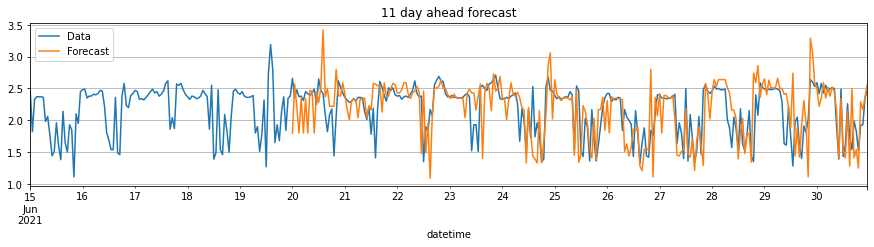

In [19]:
from sklearn.metrics import mean_squared_error as mse 
from sklearn.metrics import mean_absolute_percentage_error as mape
import numpy as np
import matplotlib.pyplot as plt


ground_truth_line = pd.concat([y_train_comp[-5*24:], y_test_comp])

naive_pred = [y_train_comp.tolist()[-1]] + y_test_comp.tolist()[:-1]
print("MAPE naive:", mape(y_test_comp, naive_pred))
print("MAPE:", mape(y_test_comp, y_test_comp_pred_dec_tree))
print("MSE:", mse(y_test_comp, y_test_comp_pred_dec_tree))
print("RMSE:", np.sqrt(mse(y_test_comp, y_test_comp_pred_dec_tree)))

plt.figure()
plot = ground_truth_line.plot(figsize=(15, 3), label='Data', legend=True, title="11 day ahead forecast")
a = pd.Series(y_test_comp_pred_dec_tree)
a.index = pd.Series(y_test_comp).index
a.plot(label='Forecast', legend=True)
plot.grid()
plt.show()


### SVM baseline model

In [26]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

sv_regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
sv_regr.fit(X_train_comp, y_train_comp)

y_train_comp_pred_svr = sv_regr.predict(X_train_comp)
y_test_comp_pred_svr = sv_regr.predict(X_test_comp)

In [27]:
MSE_test_svr_comp = mean_squared_error(y_test_comp, y_test_comp_pred_svr)

MAPE_test_svr_comp = mean_absolute_percentage_error(y_test_comp, y_test_comp_pred_svr)


print(MSE_test_svr_comp, round(MAPE_test_svr_comp * 100, 2),'%')

0.07063551478977703 9.86 %


MAPE naive: 0.12932806959843604
MAPE: 0.09856686662994323
MSE: 0.07063551478977703
RMSE: 0.2657734275464292


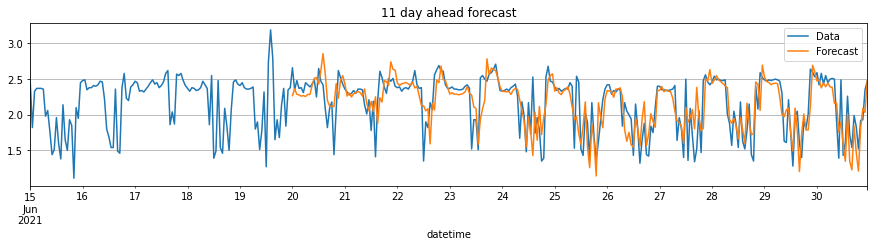

In [28]:
from sklearn.metrics import mean_squared_error as mse 
from sklearn.metrics import mean_absolute_percentage_error as mape
import numpy as np
import matplotlib.pyplot as plt


ground_truth_line = pd.concat([y_train_comp[-5*24:], y_test_comp])

naive_pred = [y_train_comp.tolist()[-1]] + y_test_comp.tolist()[:-1]
print("MAPE naive:", mape(y_test_comp, naive_pred))
print("MAPE:", mape(y_test_comp, y_test_comp_pred_svr))
print("MSE:", mse(y_test_comp, y_test_comp_pred_svr))
print("RMSE:", np.sqrt(mse(y_test_comp, y_test_comp_pred_svr)))

plt.figure()
plot = ground_truth_line.plot(figsize=(15, 3), label='Data', legend=True, title="11 day ahead forecast")
a = pd.Series(y_test_comp_pred_svr)
a.index = pd.Series(y_test_comp).index
a.plot(label='Forecast', legend=True)
plot.grid()
plt.show()

### Random Forest regression with autoregressive terms

In [20]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg = rf_reg.fit(X_train_comp, y_train_comp)

y_train_comp_pred_rf = rf_reg.predict(X_train_comp)
y_test_comp_pred_rf = rf_reg.predict(X_test_comp)


In [21]:
MSE_train_rf_comp = mean_squared_error(y_train_comp, y_train_comp_pred_rf)
MSE_test_rf_comp = mean_squared_error(y_test_comp, y_test_comp_pred_rf)

MAPE_train_rf_comp = mean_absolute_percentage_error(y_train_comp, y_train_comp_pred_rf)
MAPE_test_rf_comp = mean_absolute_percentage_error(y_test_comp, y_test_comp_pred_rf)


print(MSE_test_rf_comp, round(MAPE_test_rf_comp * 100, 2),'%')

0.06914972306821118 9.22 %


MAPE naive: 0.12932806959843604
MAPE: 0.09222992550899477
MSE: 0.06914972306821118
RMSE: 0.26296334928695136


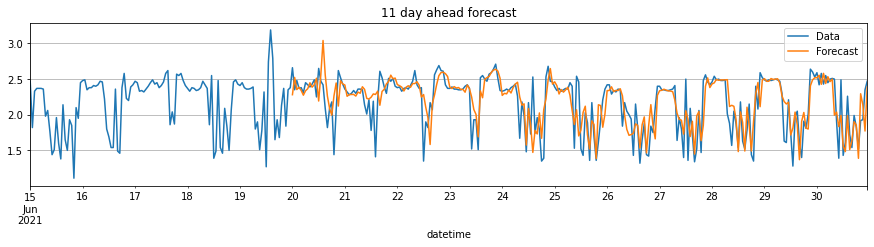

In [22]:
from sklearn.metrics import mean_squared_error as mse 
from sklearn.metrics import mean_absolute_percentage_error as mape
import numpy as np
import matplotlib.pyplot as plt


ground_truth_line = pd.concat([y_train_comp[-5*24:], y_test_comp])

naive_pred = [y_train_comp.tolist()[-1]] + y_test_comp.tolist()[:-1]
print("MAPE naive:", mape(y_test_comp, naive_pred))
print("MAPE:", mape(y_test_comp, y_test_comp_pred_rf))
print("MSE:", mse(y_test_comp, y_test_comp_pred_rf))
print("RMSE:", np.sqrt(mse(y_test_comp, y_test_comp_pred_rf)))

plt.figure()
plot = ground_truth_line.plot(figsize=(15, 3), label='Data', legend=True, title="11 day ahead forecast")
a = pd.Series(y_test_comp_pred_rf)
a.index = pd.Series(y_test_comp).index
a.plot(label='Forecast', legend=True)
plot.grid()
plt.show()

### XGBoost with autoregressive terms

In [23]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train_comp, y_train_comp)

y_test_comp_pred_xgb = xgb_reg.predict(X_test_comp)


In [24]:
MSE_test_xgb_comp = mean_squared_error(y_test_comp, y_test_comp_pred_xgb)

MAPE_test_xgb_comp = mean_absolute_percentage_error(y_test_comp, y_test_comp_pred_xgb)


print(MSE_test_xgb_comp, round(MAPE_test_xgb_comp * 100, 2),'%')

0.07544756126741867 9.56 %


MAPE naive: 0.12932806959843604
MAPE: 0.0956238310049089
MSE: 0.07544756126741867
RMSE: 0.27467719466205903


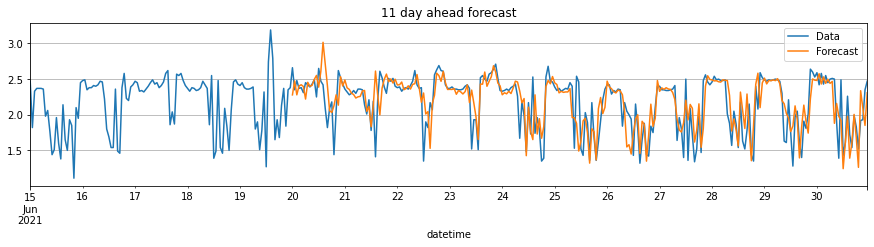

In [25]:
from sklearn.metrics import mean_squared_error as mse 
from sklearn.metrics import mean_absolute_percentage_error as mape
import numpy as np
import matplotlib.pyplot as plt


ground_truth_line = pd.concat([y_train_comp[-5*24:], y_test_comp])

naive_pred = [y_train_comp.tolist()[-1]] + y_test_comp.tolist()[:-1]
print("MAPE naive:", mape(y_test_comp, naive_pred))
print("MAPE:", mape(y_test_comp, y_test_comp_pred_xgb))
print("MSE:", mse(y_test_comp, y_test_comp_pred_xgb))
print("RMSE:", np.sqrt(mse(y_test_comp, y_test_comp_pred_xgb)))

plt.figure()
plot = ground_truth_line.plot(figsize=(15, 3), label='Data', legend=True, title="11 day ahead forecast")
a = pd.Series(y_test_comp_pred_xgb)
a.index = pd.Series(y_test_comp).index
a.plot(label='Forecast', legend=True)
plot.grid()
plt.show()